
# <center style="color:red"> **Logistic Regression** </center>

<h4 style="text-align:right">By Trần Minh Dương - Learning Support</h4>

# **Overview**  

How do we predict whether an email is spam or not, or if a patient has a disease based on their symptoms? These are classification problems, and logistic regression is a powerful tool for solving them.  

<center><img src="../images/cancerlogistic.png" width="500"></center>

Logistic regression predicts probabilities for binary outcomes. It uses the **logistic (sigmoid) function** to model the likelihood of a data point belonging to a particular class.

To optimize the model parameters, we use:  
1. **Gradient Descent:** An iterative approach to minimize the cost function.  
2. **Newton’s Method:** A second-order optimization technique for faster convergence.  

In this document, we’ll dive into the both methods and their applications.  

## 1. Logistic Regression & Gradient Descent
Logistic regression is a classification algorithm that models the probability of a binary outcome using the logistic (sigmoid) function.

### Key Points:
**Hypothesis Function:** The predicted output (probability) of logistic regression is computed as follows:

- **For a single example:**  
    $$ 
    h_\theta(x^{(i)}) = \frac{1}{1 + e^{-\theta^T x^{(i)}}}
    $$  
    Here, $ x^{(i)} $ is a single input example.

- **For the entire dataset (input matrix):**  
    $$ 
    h_\theta(X) = \frac{1}{1 + e^{-X \theta}}
    $$  

  Where:
  - $ x^{(i)} $: A column vector representing the $ i $-th example, containing $ n $ features.  
    **Dimension:** $ n \times 1 $.  
  - $ X $: The input matrix containing $ m $ examples and $ n $ features.  
    **Dimension:** $ m \times n $.  
  - $ \theta $: The parameter vector containing $ n $ weights (including $ \theta_0 $, the bias term).  
    **Dimension:** $ n \times 1 $.

**Cost function:** 

To optimize $ \theta $, we minimize the negative log-likelihood cost function:
$$
J(\theta) = - \frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

Where:
+ $ m $: Number of training examples.
+ $ y^{(i)} $: Actual label (0 or 1) for the $ i $-th training example.
+ $ h_\theta(x^{(i)}) $: Predicted probability for the $ i $-th training example.

**Steps for Batch Gradient Descent of Logistic Regression:**

This follows **exactly the same** procedure as Linear Regression. To minimize $ J(\theta) $, we compute its gradient and update $ \theta $ iteratively:

- **Scalar form:**

    For $ j = 0, 1, ..., n $:

    $$
    \boxed{
    \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)} \right) \cdot x_j^{(i)}}
    $$

    Where:
    + $h_\theta(x^{(i)})$ is the predicted output
    + $h_\theta(x^{(i)}) - y^{(i)}$ is the residuals (error compared to actual output)
    + $x^{(i)}_j$ is the j-th feature value of the i-th training example

    Then the parameters $ \theta $ are updated as:

    $$
    \boxed{
    \theta_j = \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
    }
    $$


- **Matrix Form (for all $ \theta $):**
    The gradient can also be written compactly in matrix form as:

    $$
    \boxed{
    \nabla J(\theta) = \frac{1}{m} X^T (h_\theta(X) - y)
    }
    $$

    Where:
    + $ X $: Feature matrix (including a column of 1s for the bias term).
    + $ h_\theta(X) $: Vector of predicted probabilities for all training examples.
    + $ y $: Vector of actual labels.

    Update Rule in Matrix Form:

    $$
    \boxed{
    \theta = \theta - \alpha \nabla J(\theta)
    }
    $$

---

## 2. Newton's Method for Logistic Regression
Newton's method refines the parameters $ \theta $ using second-order derivative, incorporating the Hessian matrix $ H $:

1. **Gradient:** Same as above:

$$
\nabla J(\theta) = \frac{1}{m} X^T (h_\theta(X) - y)
$$

2. **Hessian Matrix:**

  $$
  \boxed{
    H = \frac{1}{m} X^T R X
  }
  $$

  Where:
  + $ R $: Diagonal matrix where $ R_{ii} = h_\theta(x^{(i)}) \cdot (1 - h_\theta(x^{(i)})) $.

3. **Update Rule:**

$$
\boxed{
  \theta = \theta - H^{-1} \nabla J(\theta)
}
$$

Newton's method often converges faster than gradient descent but is computationally expensive for large datasets.

---

## Summary of Key Differences
| Aspect               | Gradient Descent                   | Newton's Method              |
|----------------------|------------------------------------|-----------------------------|
| **Approach**         | Iterative, uses first derivative   | Iterative, uses first and second derivatives |
| **Computation Cost** | Lower per iteration                | Higher per iteration due to Hessian inversion |
| **Convergence Speed**| Slower for large datasets          | Faster, but depends on dataset size |
| **Suitability**      | Large datasets or high dimensions  | Small to medium datasets    |

---

# **Exercise**

Given the training data for a classification problem, to identify if a person is
male/female base on his/her weight and high. Stating at $\theta_{0} = \theta_{1} = \theta_{2} = 0$ and learning rate $\alpha = 0.001$ .

<center>

| Training example | Height(cm) | Weight (kg) | Gender |
|:----------------:|:----------:|:-----------:|:------:|
| 1                | 172        | 68          | Male   |
| 2                | 163        | 52          | Female |
| 3                | 158        | 50          | Female |
| 4                | 180        | 75          | Male   |

</center>

Calculate the coefficients after the first iteration with

a) Batch-gradient descent.

b) Newton method

### Part a: Using Batch-gradient descent

In [15]:
#Dataset
import numpy as np
X = np.array([
    [1,172,68],
    [1,163,52],
    [1,158,50],
    [1,180,75]
]) #Add a column of 1 to the left to represent the bias term X_0
y = np.array([0,1,1,0]) # 0 for male, 1 for female

m = len(y)
alpha = 0.001

In [16]:
theta = np.array([0,0,0],dtype=float)
def hypothesis(X, theta):
    return 1 / (1 + np.exp(-X @ theta))

def cost_func(predictions, y):
    return -1/m * np.sum(y*np.log(predictions) + (1-y)*np.log(1-predictions))

iterations = 100
for i in range(1,iterations+1):
    predictions = hypothesis(X,theta)

    errors = predictions - y

    gradient = 1/m * (X.T @ errors)

    theta -= alpha * gradient

    if (i==1):
        print("After the first iteration:")
        print("Predictions: ",predictions)
        print("Errors: ", errors)
        print("Gradient: ",gradient)
        print("Theta = ",theta)
        print("Cost = ",cost_func(predictions,y),"\n")

    if (i%10==0):
        print(f"Iteration {i}: Theta = {theta}, Cost = {cost_func(predictions,y):.4f}")

After the first iteration:
Predictions:  [0.5 0.5 0.5 0.5]
Errors:  [ 0.5 -0.5 -0.5  0.5]
Gradient:  [0.    3.875 5.125]
Theta =  [ 0.       -0.003875 -0.005125]
Cost =  0.6931471805599453 

Iteration 10: Theta = [ 0.00038151  0.02552992 -0.0277586 ], Cost = 5.7494
Iteration 20: Theta = [ 0.00068845  0.03880599 -0.05969616], Cost = 5.4982
Iteration 30: Theta = [ 0.0009826   0.05043766 -0.09177184], Cost = 5.3825
Iteration 40: Theta = [ 0.0012791  0.0629325 -0.1231119], Cost = 5.1787
Iteration 50: Theta = [ 0.0015715   0.07509407 -0.15425996], Cost = 4.9968
Iteration 60: Theta = [ 0.0018635   0.08748283 -0.18507323], Cost = 4.7880
Iteration 70: Theta = [ 0.00215382  0.09980324 -0.21573278], Cost = 4.5807
Iteration 80: Theta = [ 0.00244351  0.11218556 -0.24623472], Cost = 4.3643
Iteration 90: Theta = [ 0.00273237  0.12455841 -0.27664243], Cost = 4.1461
Iteration 100: Theta = [ 0.00302071  0.13694618 -0.30696939], Cost = 3.9242


In [17]:
#Assume me, a guy who is 170cm short and 62kg fat, lets see what gender I am
def what_gender_am_I(height,weight):
    tmd = np.array([1,height,weight])
    tmd_gender = hypothesis(tmd,theta)
    print(tmd_gender)

    if (tmd_gender < 0.5): #male
        print("A dude 🤨")
    elif (tmd_gender > 0.5): #female
        print("A cutie patooie 😍")

what_gender_am_I(170,62)

0.9859608815891429
A cutie patooie 😍


### Part b: Using Newton method

Recall:

$$
\nabla J(\theta) = \frac{1}{m} X^T (h_\theta(X) - y)
$$

$$
H = \frac{1}{m} X^T R X
$$

$$
\theta = \theta - H^{-1} \nabla J(\theta)
$$

In [18]:
theta = np.array([0,0,0],dtype=float)

def hypothesis(X,theta):
    return 1 / (1+ np.exp(-X @ theta))

def compute_gradient(X,y,theta):
    gradient = 1/m * X.T @ (hypothesis(X,theta) - y)
    return gradient

def compute_hessian(X,theta):
    h = hypothesis(X,theta)
    R = np.diag(h*(1-h))
    return 1/m * (X.T @ R @ X)

gradient = compute_gradient(X, y, theta)
hessian = compute_hessian(X, theta)
theta = theta - np.linalg.inv(hessian) @ gradient

print("After one iteration: ")
print("Gradient:\n", gradient)
print("Hessian:\n", hessian)
print("Updated Theta:\n", theta)

After one iteration: 
Gradient:
 [0.    3.875 5.125]
Hessian:
 [[2.5000000e-01 4.2062500e+01 1.5312500e+01]
 [4.2062500e+01 7.0948125e+03 2.5982500e+03]
 [1.5312500e+01 2.5982500e+03 9.6581250e+02]]
Updated Theta:
 [-19.26812373   0.25391138  -0.38289741]


In [19]:
#Now let's ask for Mr.Newton's opinion about my gender
what_gender_am_I(170,62)

0.539212276978382
A cutie patooie 😍


In [20]:
#Maybe Mr.Newton will change his mind after 20 iterations?
theta = np.array([0,0,0],dtype=float)
iterations = 20
for i in range(1,iterations+1):
    gradient = compute_gradient(X, y, theta)
    hessian = compute_hessian(X, theta)
    theta = theta - np.linalg.inv(hessian) @ gradient

what_gender_am_I(170,62)

0.2076754683472401
A dude 🤨


### **BONUS: Tips for your model to work correctly and efficiently**:
- Try different values of the hyperparameter $\alpha$, whether it is 0.1, 0.01 or 0.001

- Add more and more iterations so your model can reach the optimal solution

- Try different initial parameters to begin with. A cost function may have many local minimums, yet there is only 1 global minimum.

- Visualize convergence by plotting the cost function over iterations to confirm it is decreasing.

### Here's a quick visualization for the Gradient Descent with different values of $\alpha$


Running gradient descent with alpha = 0.0001...
Alpha = 0.0001, Iteration 1: Theta = [ 0.        -0.0003875 -0.0005125], Cost = 0.6931
Alpha = 0.0001, Iteration 10: Theta = [ 2.61383667e-05  5.59458853e-04 -3.47731806e-03], Cost = 0.6806
Alpha = 0.0001, Iteration 20: Theta = [ 5.56316431e-05  1.73488809e-03 -6.68271752e-03], Cost = 0.6689
Alpha = 0.0001, Iteration 30: Theta = [ 8.47464161e-05  2.89547698e-03 -9.84821154e-03], Cost = 0.6575

Running gradient descent with alpha = 0.001...
Alpha = 0.001, Iteration 1: Theta = [ 0.       -0.003875 -0.005125], Cost = 0.6931
Alpha = 0.001, Iteration 10: Theta = [ 0.00038151  0.02552992 -0.0277586 ], Cost = 5.7494
Alpha = 0.001, Iteration 20: Theta = [ 0.00068845  0.03880599 -0.05969616], Cost = 5.4982
Alpha = 0.001, Iteration 30: Theta = [ 0.0009826   0.05043766 -0.09177184], Cost = 5.3825


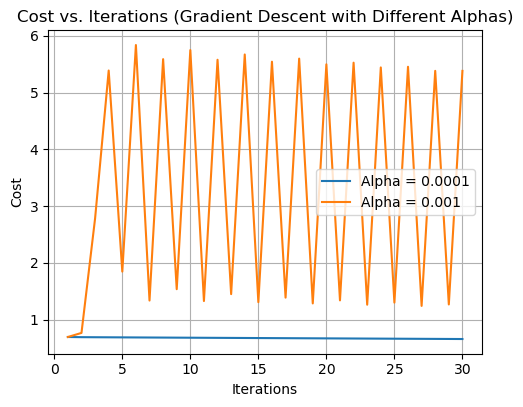

In [21]:
import matplotlib.pyplot as plt
def gradient_descent(X, y, alpha, iterations):
    theta = np.array([0,0,0], dtype=float)
    costs = []
    
    for i in range(1, iterations + 1):
        predictions = hypothesis(X, theta)
        errors = predictions - y 
        gradient = 1/m * (X.T @ errors)
        theta -= alpha * gradient
        
        cost = cost_func(predictions, y)
        costs.append(cost)
        
        if i == 1 or i % 10 == 0:
            print(f"Alpha = {alpha}, Iteration {i}: Theta = {theta}, Cost = {cost:.4f}")
    
    return theta, costs

iterations = 30
alphas = [0.0001, 0.001]
costs_by_alpha = {}

for alpha in alphas:
    print(f"\nRunning gradient descent with alpha = {alpha}...")
    theta, costs = gradient_descent(X, y, alpha, iterations)
    costs_by_alpha[alpha] = costs

plt.figure(figsize=(5.6, 4.2))
for alpha, costs in costs_by_alpha.items():
    plt.plot(range(1, iterations + 1), costs, label=f"Alpha = {alpha}")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations (Gradient Descent with Different Alphas)")
plt.legend()
plt.grid()
plt.show()

As you can see, with $\alpha$ = 0.0001, our cost steadily decreases while it fluctuates with $\alpha$ = 0.001 

---

<p>
    This document was created in Jupyter Notebook by <span style="color:red;">Trần Minh Dương (tmd)</span>.
</p>

<p>
    If you have any questions or notice any errors, feel free to reach out via Discord at 
    <span style="color:blue;">@tmdhoctiengphap</span> or <span style="color:red;">@ICT-Supporters</span> on the USTH Learning Support server.
</p>

<p>
    Check out my GitHub repository for more projects: 
    <a href="https://github.com/GalaxyAnnihilator/MachineLearning" target="_blank">
        GalaxyAnnihilator/MachineLearning
    </a>.
</p>
